https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression/data

**Salary dependence on work experience**

In [90]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
path_file = '/content/drive/MyDrive/Colab Notebooks/Colab/Salary/Salary_dataset.csv'
df_data = pd.read_csv(path_file)

df_data


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [92]:
# df_data = df_data.rename(columns={'Unnamed: 0': 'id'})
# df_data

In [93]:
df_data.drop('Unnamed: 0', axis=1)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [94]:
print("Name columns:")
df_data.columns

Name columns:


Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [95]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [96]:
df_data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [97]:
print("\nПеревірка на пропущені значення:")
df_data.isnull().sum()


Перевірка на пропущені значення:


,0
Unnamed: 0,0
YearsExperience,0
Salary,0


In [98]:
print("\nПеревірка наявності дублікатів:")
df_data.duplicated().sum()


Перевірка наявності дублікатів:


0

In [99]:
df_Salary = df_data['Salary'].value_counts()
df_Salary

,count
Salary,
39344.0,1
46206.0,1
122392.0,1
112636.0,1
116970.0,1
105583.0,1
109432.0,1
113813.0,1
101303.0,1


In [100]:
mean_salary = df_data.groupby('YearsExperience')['Salary'].mean().reset_index()
mean_salary

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,59446.0
8,3.8,57190.0
9,4.0,63219.0


In [101]:
print(mean_salary.dtypes)


YearsExperience    float64
Salary             float64
dtype: object


In [102]:
# import matplotlib.ticker as ticker


# plt.figure(figsize=(10, 6))
# sns.barplot(x='YearsExperience', y='Salary', data=mean_salary, palette='viridis')

# ax = plt.gca()
# plt.xticks(rotation=30)
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

# plt.title('Вплив стажу роботи на Заробітну плату', fontsize=16)
# plt.xlabel('Стаж', fontsize=14, rotation=45)
# plt.ylabel('ЗП', fontsize=14 )

# plt.show()




In [103]:
import plotly.express as px


fig = px.scatter(data_frame=df_data, x="YearsExperience", y="Salary",
                 size="YearsExperience", trendline='ols')
fig.show()

In [104]:
df_corr = df_data.corr()['YearsExperience']
df_corr

,YearsExperience
Unnamed: 0,0.986460
YearsExperience,1.000000
Salary,0.978242


In [105]:
df_data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
X = mean_salary.drop('Salary', axis=1).values
y = mean_salary['Salary'].values

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print('X_train', X_train)
print('X_test', X_test)

X_train [[ 6.1]
 [ 8.8]
 [ 4.2]
 [ 5. ]
 [ 5.4]
 [ 1.4]
 [ 2.3]
 [ 3. ]
 [ 1.6]
 [ 6. ]
 [ 9.1]
 [ 2.1]
 [10.4]
 [ 9.6]
 [ 6.9]
 [10.6]
 [ 8. ]
 [ 3.3]
 [ 4.1]
 [ 5.2]
 [ 7.2]
 [ 3.1]]
X_test [[4. ]
 [9.7]
 [3.8]
 [8.3]
 [1.2]
 [4.6]]


In [108]:
# Ініціалізуємо модель лінійної регресії
model = LinearRegression()

# Навчаємо модель на даних
model.fit(X_train, y_train)

LinearRegression()

In [109]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [110]:
print(X_train.shape)
print(y_train.shape)

(22, 1)
(22,)


In [111]:
from sklearn.metrics import mean_squared_error, r2_score

# Виводимо коефіцієнти регресії
print(f'Intercept: {model.intercept_:.4f}')  # Вільний член (інтерцепт)
print(f'Coefficients: {model.coef_}')  # Коефіцієнти для ознак

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MAE: {train_mae:.4f}, MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Testing MAE: {test_mae:.4f}, MSE: {test_mse:.4f}, R²: {test_r2:.4f}")
print(f'Prediction train {y_train_pred}')
print(f'Prediction  test {y_test_pred}')



Intercept: 25495.1894
Coefficients: [9368.63316159]
Training MAE: 4399.7049, MSE: 28222681.4971, R²: 0.9615
Testing MAE: 4755.6188, MSE: 33911809.0964, R²: 0.9580
Prediction train [ 82643.85173387 107939.16127017  64843.44872685  72338.35525612
  76085.80852076  38611.27587439  47043.04571982  53601.08893294
  40485.00250671  81706.98841771 110749.75121865  45169.31908751
 122928.97432872 115434.06779944  90138.75826315 124802.70096103
 100444.2547409   56411.67888142  63906.58541069  74212.08188844
  92949.34821162  54537.9522491 ]
Prediction  test [ 62969.72209453 116370.9311156   61095.99546221 103254.84468937
  36737.54924207  68590.90199148]


***Виконаємо зворотнє масштабування.***

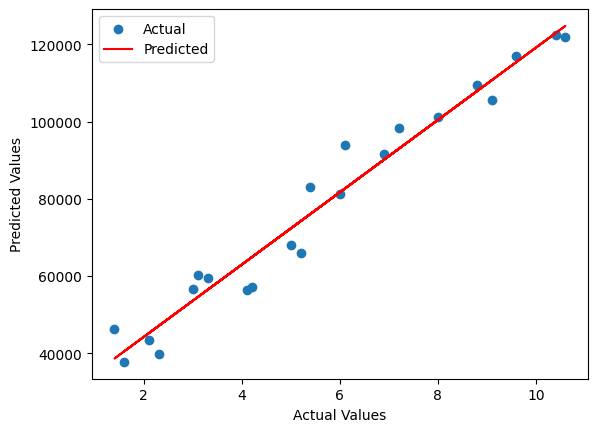

In [115]:
plt.scatter(X_train,y_train, label='Actual')
plt.plot(X_train,model.predict(X_train),color='red', label='Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

**Середня квадратична помилка (MSE)**

Визначення: вимірює середню квадратичну різницю між прогнозованими та фактичними значеннями.
Інтерпретація: нижчий MSE вказує на кращу відповідність моделі.
У вашому випадку:
train_rme: середня квадратична помилка моделі на даних навчання становить 28 222 681,497.
test_rme: середня квадратична помилка моделі на основі даних тестування становить 33 911 809,096.

R-квадрат (R²)
Визначення: вимірює частку дисперсії залежної змінної, яка пояснюється незалежною змінною(ями).
Інтерпретація: значення R², ближче до 1, означає кращу відповідність моделі.
У вашому випадку:
train_r2: Модель пояснює 96,15% дисперсії даних навчання.
test_r2: Модель пояснює 95,79% відхилень у даних тестування.

Детальний аналіз результатів лінійної регресії
Розуміння виведених значень
Intercept (Перехоплення):

Значення 5.2875: Означає, що якщо співробітник має нульовий стаж, то його прогнозована зарплата складатиме приблизно 5.2875 одиниць (в залежності від одиниць вимірювання зарплати в ваших даних). Звісно, в реальному житті не буває співробітників з нульовим стажем, але це значення дає нам базовий рівень зарплати.
Coefficients (Коефіцієнти):

1.63498821: Це коефіцієнт при ознаці "YearsExperience". Він показує, що в середньому зарплата зростає на 1.6349 одиниць при збільшенні стажу на один рік. Іншими словами, кожен додатковий рік стажу пов'язаний зі збільшенням зарплати приблизно на 1635 одиниць.
MAE, MSE, R²:

MAE (Mean Absolute Error): Середня абсолютна похибка. Показує, наскільки в середньому наші прогнози відрізняються від фактичних значень зарплати. Чим менше значення, тим точніші прогнози.
MSE (Mean Squared Error): Середньоквадратична похибка. Подібна до MAE, але більше наголошує на великих похибках.
R² (Коефіцієнт детермінації): Показує, яка частка дисперсії цільової змінної (зарплати) пояснюється нашою моделлю. Значення 0.9884 на тренувальній вибірці та 0.9615 на тестовій вибірці означає, що наша модель досить добре пояснює залежність зарплати від стажу.
Prediction train та Prediction test:

Це масиви прогнозованих значень зарплати для тренувальної та тестової вибірок відповідно. Ви можете порівняти ці значення з фактичними значеннями зарплати, щоб оцінити якість прогнозів.
Висновок
На основі отриманих результатів можна зробити такі висновки:

Існує сильний позитивний зв'язок між стажем роботи та зарплатою: Кожен додатковий рік стажу суттєво впливає на зростання зарплати.
Модель лінійної регресії добре описує дані: Високий коефіцієнт детермінації (R²) свідчить про те, що наша модель досить точно прогнозує зарплату на основі стажу.
Модель узагальнюється на нові дані: Невелика різниця між результатами на тренувальній та тестовій вибірках свідчить про те, що модель не перенавчається і здатна робити прогнози на нових даних.
Подальші кроки
Візуалізація: Можна побудувати графік, що відображає фактичні та прогнозовані значення зарплати, щоб візуально оцінити якість моделі.
Аналіз залишків: Перевірити, чи залишки моделі (різниця між фактичними та прогнозованими значеннями) розподілені випадковим чином.
Розширення моделі: Додати додаткові ознаки (наприклад, освіта, галузь), щоб покращити точність прогнозування.
Інші моделі: Порівняти результати лінійної регресії з іншими моделями машинного навчання, такими як дерево рішень або випадковий ліс.
Важливо пам'ятати:

Цей аналіз базується на припущенні, що лінійна регресія є адекватним методом для моделювання залежності зарплати від стажу.
Для більш складних задач може знадобитися використовувати більш складні моделі або методи.
Завжди варто перевіряти припущення моделі та інтерпретувати результати з обережністю.